In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
root_data_dir = "."

POSITIONS = ['I', 'II', 'III', 'IV', 'V', 'VI']

match = pd.ExcelFile(
    os.path.join(
        root_data_dir, "data.xlsx"
    )
)

In [3]:
sheet_names = match.sheet_names
sheet_names

['points',
 'players',
 'lineup_set1',
 'lineup_set2',
 'lineup_set3',
 'lineup_set4',
 'lineup_set5',
 'timeouts',
 'durations']

In [4]:
points = pd.read_excel(match, "points")
players = pd.read_excel(match, "players")
players = players.query("registered == True")
lineup_set1 = pd.read_excel(match, "lineup_set1", index_col=0)
lineup_set2 = pd.read_excel(match, "lineup_set2", index_col=0)
lineup_set3 = pd.read_excel(match, "lineup_set3", index_col=0)
lineup_set4 = pd.read_excel(match, "lineup_set4", index_col=0)
timeouts = pd.read_excel(match, "timeouts")
durations = pd.read_excel(match, "durations")

In [5]:
numbers_to_players_dict = {
    row['number']:row['name'] for index, row in players[['number', 'name']].iterrows()
}
players_to_number_dict = {
    v:k for k, v in numbers_to_players_dict.items()
}
numbers_to_position_dict = {
    row['number']:row['position'] for index, row in players[['number', 'position']].iterrows()
}
lineups = {
    1:lineup_set1,
    2:lineup_set2,
    3:lineup_set3,
    4:lineup_set4
}

In [6]:
chosen_set = 4

In [7]:
from src.match_data import *
df = create_scores_series(points, chosen_set)
df = initialize_positions(df, lineups, chosen_set)
df = rotate_all_positions(df)
df = player_change_positions(df, lineups, chosen_set)
df = switch_lib_in_V_VI_I(df, players)
melted_df = melt_set_data(df, chosen_set)

In [8]:
set1_data = create_set_data(1, points, lineups, players)
match_data = create_match_data(points, lineups, players)
positions_data = create_positions_data(match_data, numbers_to_position_dict, numbers_to_players_dict)
plus_minus_data = create_plus_minus_data(positions_data, numbers_to_position_dict, players_to_number_dict)
serve_data = create_serve_data(positions_data, numbers_to_position_dict, players_to_number_dict)

/Users/wesleymonteith/code/volley_m4_lausanne/src/match_data.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serve_data['new_server'] = serve_data['new_server'].cumsum()


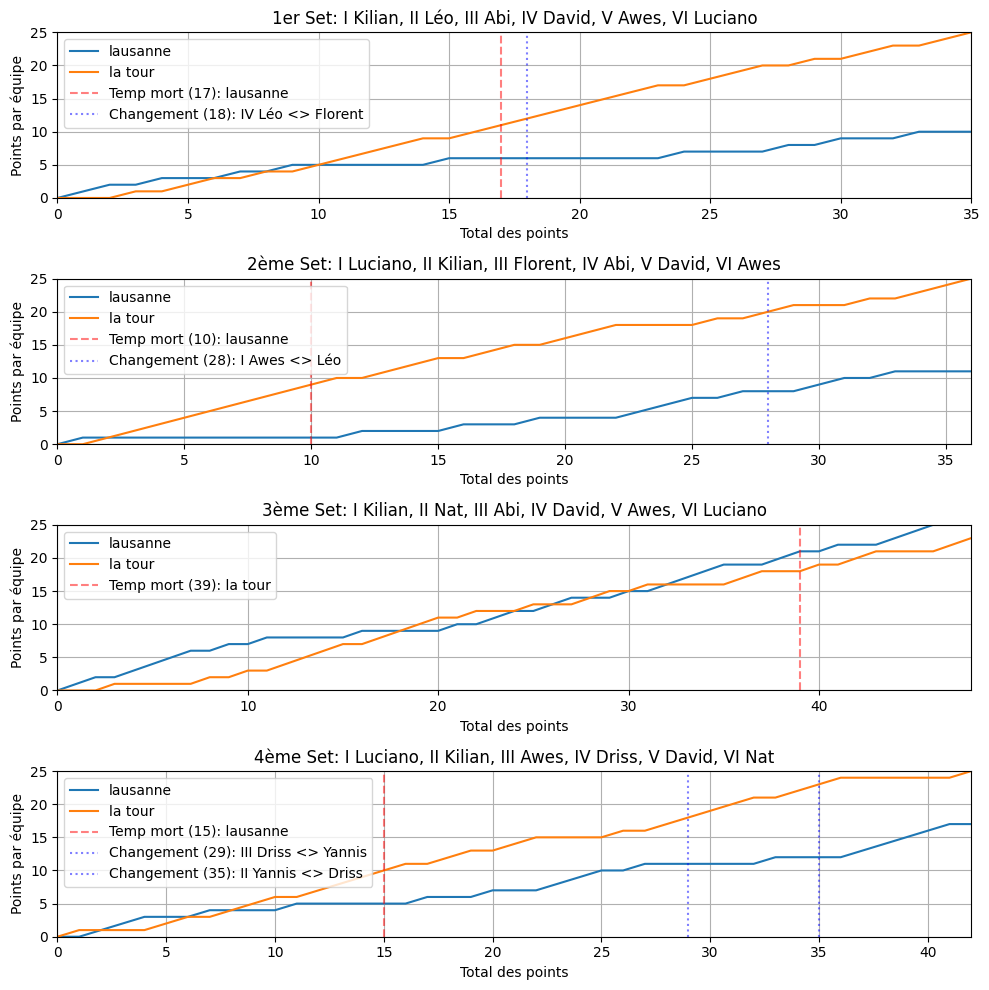

In [9]:
from src.plots import *

fig, axes = plt.subplots(nrows=match_data['set'].max(), ncols=1, figsize=(10, 10), sharex=False)
for i, ax in enumerate(axes.flatten()):
    axes[i] = plot_set_progress(match_data, i+1, lineups, timeouts, numbers_to_players_dict, axes[i])
plt.tight_layout()

/Users/wesleymonteith/code/volley_m4_lausanne/src/plots.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


<Axes: title={'center': 'Points Joués par Position'}, xlabel='Joueurs', ylabel='Points joués'>

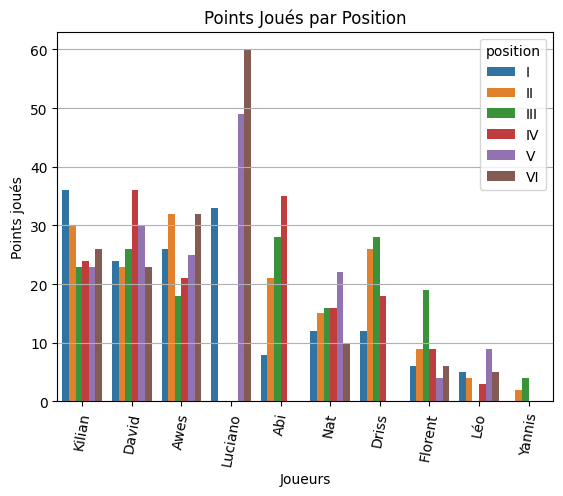

In [10]:
fig, ax = plt.subplots()
plot_points_at_each_position(ax, positions_data)

/Users/wesleymonteith/code/volley_m4_lausanne/src/plots.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


<Axes: title={'center': 'Points Joués par Joueurs'}, xlabel='Joueurs', ylabel='Points joués'>

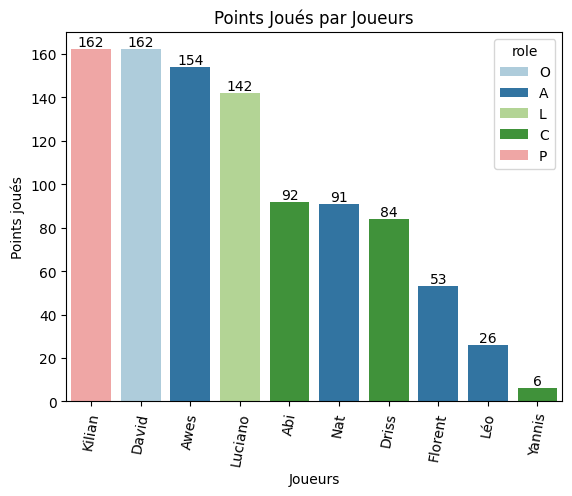

In [11]:
fig, ax = plt.subplots()
plot_points_played(ax, positions_data)

/Users/wesleymonteith/code/volley_m4_lausanne/src/plots.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


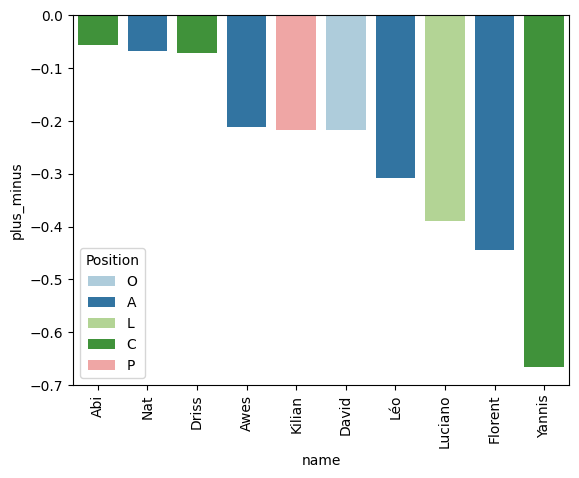

In [12]:
fig, ax = plt.subplots()
plot_plus_minus(ax, plus_minus_data)
plt.show()

/Users/wesleymonteith/code/volley_m4_lausanne/src/plots.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


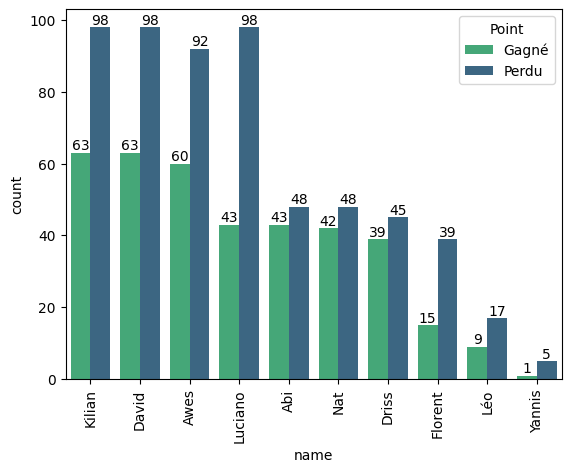

In [13]:
fig, ax = plt.subplots()
plot_points_won_and_lost(ax, positions_data)
plt.show()

/Users/wesleymonteith/code/volley_m4_lausanne/src/plots.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


<Axes: title={'center': 'Nombre de Passages au Service'}, xlabel='Joueurs', ylabel='Nombre de Passages au Service'>

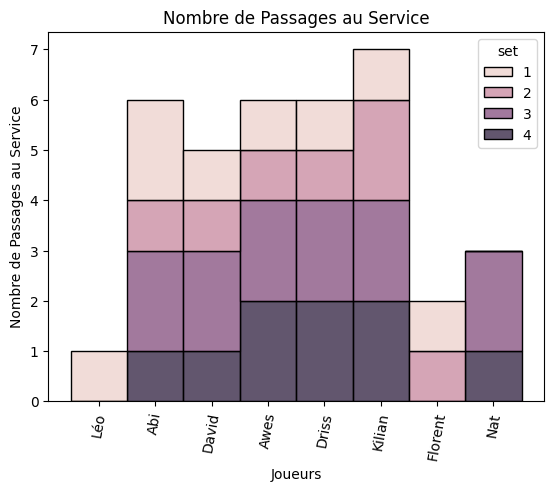

In [14]:
fig, ax = plt.subplots()
plot_serve_switches(ax, positions_data)

/Users/wesleymonteith/code/volley_m4_lausanne/src/plots.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


<Axes: title={'center': 'Nombre de Service fais'}, xlabel='Joueurs', ylabel='Nombre de Service fais'>

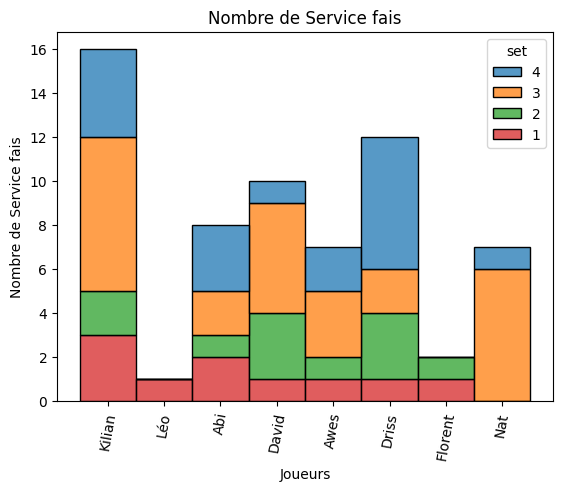

In [15]:
fig, ax = plt.subplots()
plot_serve_instances(ax, positions_data)

<Axes: xlabel='name', ylabel='count'>

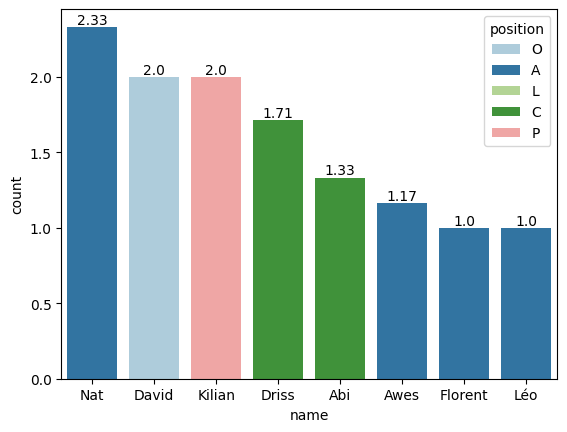

In [16]:
fig, ax = plt.subplots()
plot_serve_percentage(ax, serve_data)

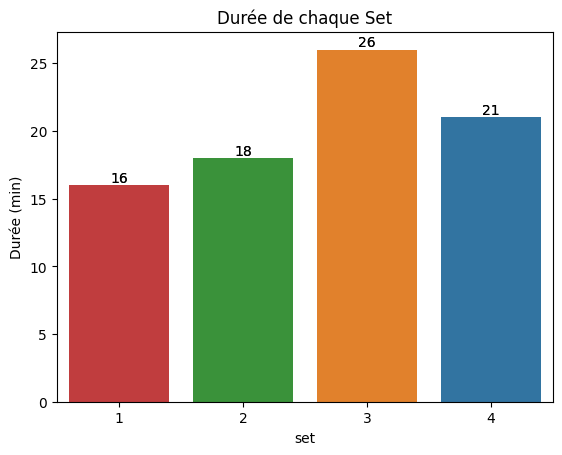

In [17]:
fig, ax = plt.subplots()
plot_set_durations(ax, durations)
for label in ax.containers:
    ax.bar_label(label)

/Users/wesleymonteith/code/volley_m4_lausanne/src/plots.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
/Users/wesleymonteith/code/volley_m4_lausanne/src/plots.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
/Users/wesleymonteith/code/volley_m4_lausanne/src/plots.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
/Users/wesleymonteith/code/volley_m4_lausanne/src/plots.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


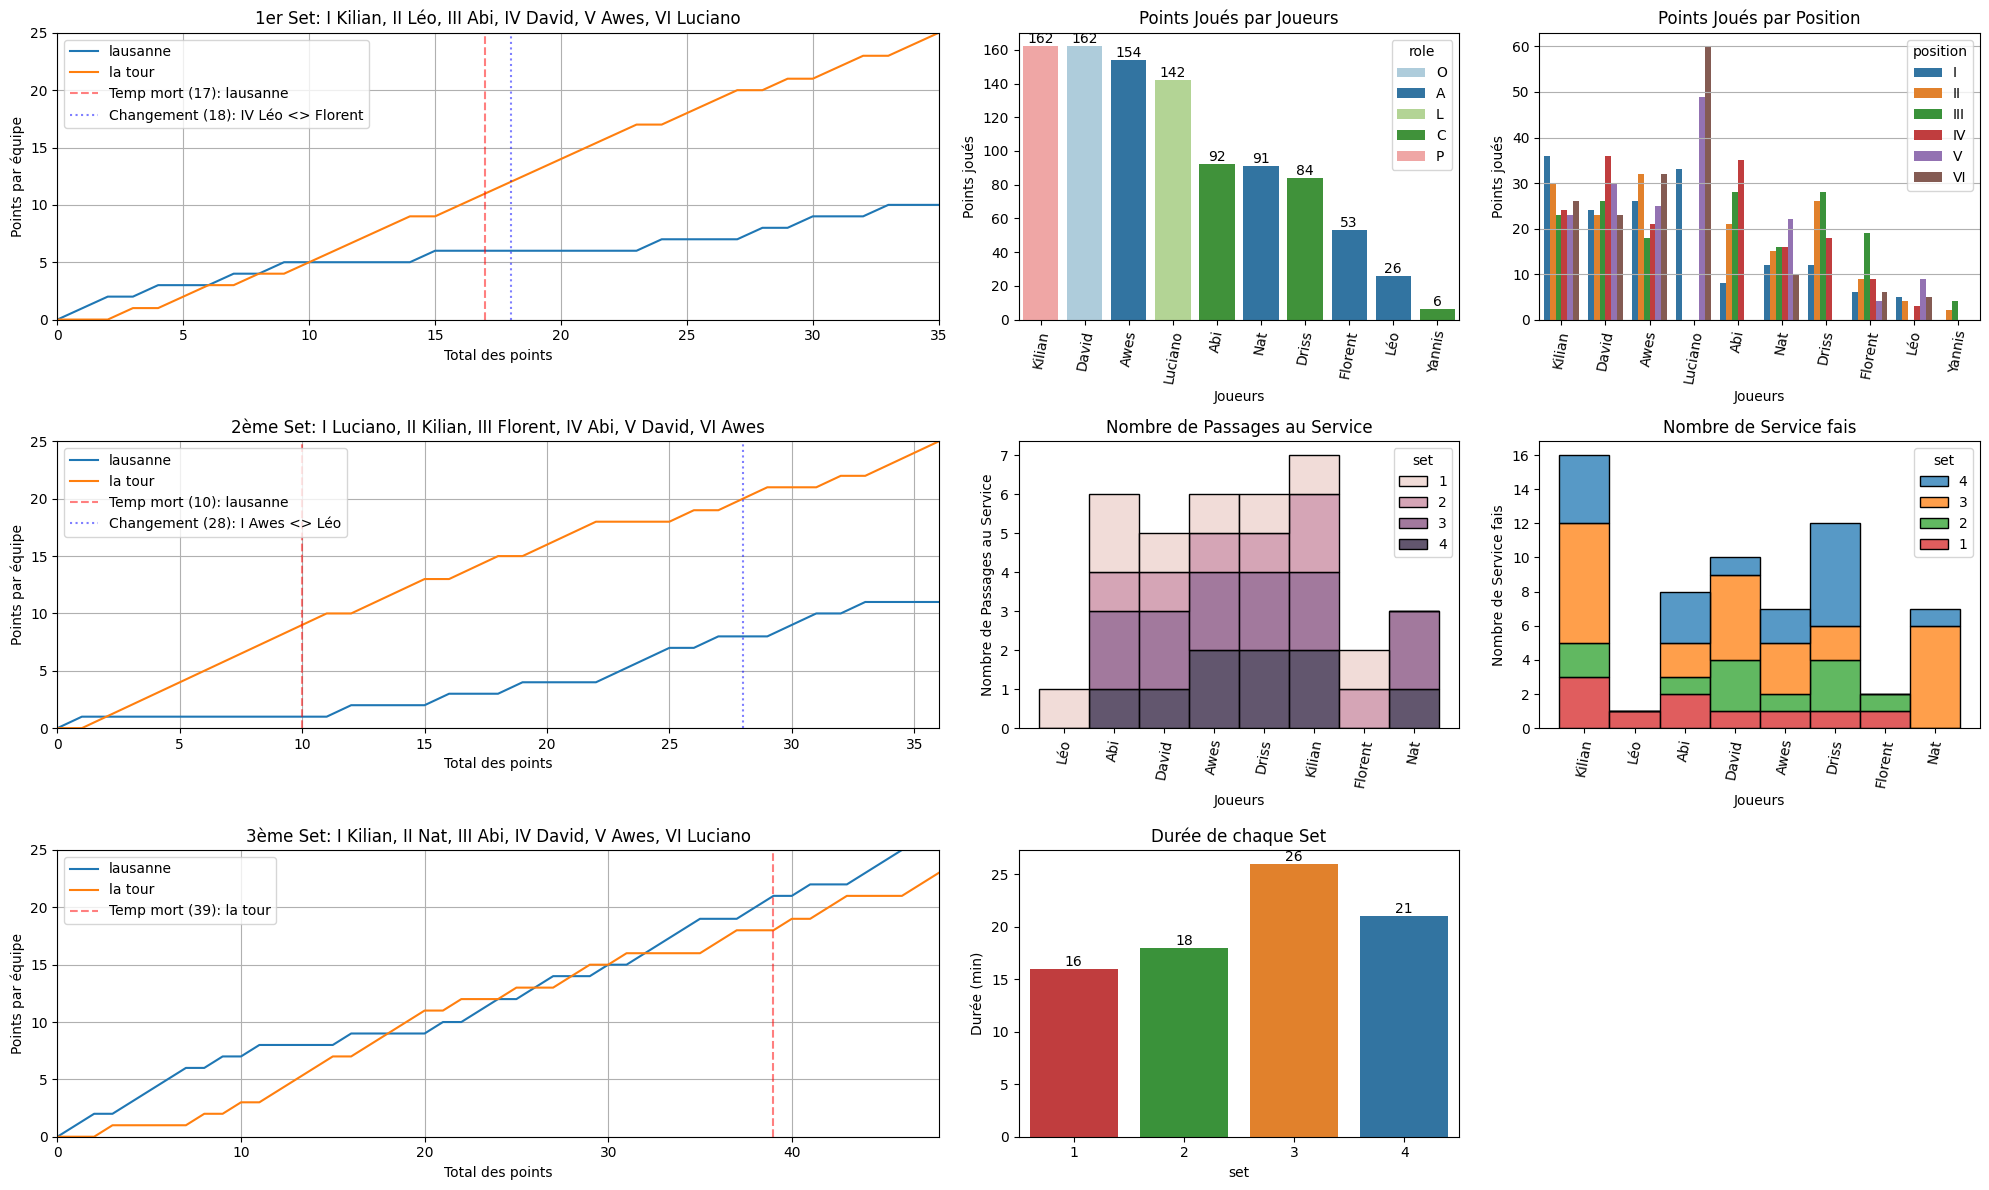

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,12), width_ratios=[0.4, 0.2, 0.2])
plot_set_progress(match_data, 1, lineups, timeouts, numbers_to_players_dict, axes[0, 0])
plot_set_progress(match_data, 2, lineups, timeouts, numbers_to_players_dict, axes[1, 0])
plot_set_progress(match_data, 3, lineups, timeouts, numbers_to_players_dict, axes[2, 0])
plot_points_played(axes[0, 1], positions_data)
plot_points_at_each_position(axes[0, 2], positions_data)
plot_serve_switches(axes[1, 1], positions_data)
plot_serve_instances(axes[1, 2], positions_data)
plot_set_durations(axes[2, 1], durations)
axes[2, 2].set_visible(False)
plt.tight_layout()
plt.savefig('Résumé_match_1_contre_La_Tour.png', dpi=400)

In [1]:
match_data

NameError: name 'match_data' is not defined

In [32]:
match_data[] (match_data[POSITIONS].astype(int).astype(str) + ';' ).sum(axis=1)

0      8;4;1;10;13;11;
1      8;4;1;10;13;11;
2      8;4;1;10;13;11;
3      8;4;1;10;13;11;
4      4;1;10;13;11;8;
            ...       
81     7;10;21;1;8;13;
82     7;10;21;1;8;13;
83     7;10;21;1;8;13;
84     7;10;21;1;8;13;
85    11;10;21;1;8;13;
Length: 330, dtype: object

In [26]:
';'.join([match_data[pos].astype(int).astype(str) for pos in POSITIONS])

TypeError: sequence item 0: expected str instance, Series found